In [278]:
import os 
os.chdir("C:\\Users\\hp\\Desktop\\locker\\miniproject")

# Importing dependencies

In [279]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import joblib
import pickle

# Data Collection and analysis

In [280]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [281]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [282]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [283]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [284]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [285]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [286]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [287]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# Data Preprocessing

## separating features and the target

In [288]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [289]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [290]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [291]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [292]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X, Y = smt.fit_resample(X, Y)

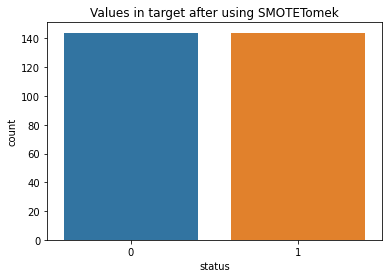

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Values in target after using SMOTETomek')
sns.countplot(x=Y)
plt.show()

In [294]:
X.shape

(288, 22)

## Splitting the data to training data & Test data

In [295]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [296]:
print(X.shape, X_train.shape, X_test.shape)

(288, 22) (230, 22) (58, 22)


## Data Standardization

In [297]:
scaler = StandardScaler()

In [298]:
scaler.fit(X_train)

StandardScaler()

In [299]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [300]:
print(X_train)

[[-0.88586392 -0.77499752 -0.30208082 ...  0.71319152  1.81436337
   2.11945528]
 [ 1.18979656  0.38969445 -0.36717714 ... -2.2540846  -0.37908863
  -0.93813311]
 [-1.12013925 -0.97269795 -1.01550973 ...  0.69816111 -0.39791068
   0.73478969]
 ...
 [-1.16583147  4.53001366 -0.4712036  ...  1.26728766 -0.98371125
   0.52066116]
 [-0.54633623  0.13065426 -0.90417026 ...  0.10938219 -0.25456386
   0.62096214]
 [-1.15488095 -0.86621834 -0.49495191 ...  0.2138267  -0.28652289
  -0.19451077]]


# Model Training

## Accuracy calculator function

In [301]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

## Gaussian Naive Bayes

In [302]:
gb = GaussianNB()
gb.fit(X_train, Y_train)

GaussianNB()

In [303]:
predgbtrain = gb.predict(X_train)
predgbtest = gb.predict(X_test)

In [304]:
acc_report(Y_train, predgbtrain)

the accuracy of tha model is  0.8173913043478261
[[111   7]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       118
           1       0.92      0.69      0.79       112

    accuracy                           0.82       230
   macro avg       0.84      0.81      0.81       230
weighted avg       0.84      0.82      0.81       230



In [305]:
acc_report(Y_test, predgbtest)
accgb = 0.615 * 100

the accuracy of tha model is  0.7068965517241379
[[25  1]
 [16 16]]
              precision    recall  f1-score   support

           0       0.61      0.96      0.75        26
           1       0.94      0.50      0.65        32

    accuracy                           0.71        58
   macro avg       0.78      0.73      0.70        58
weighted avg       0.79      0.71      0.69        58



## Decision Tree Classifier

In [306]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [307]:
predttrain = dt.predict(X_train)
predttest = dt.predict(X_test)

In [308]:
acc_report(Y_train, predttrain)

the accuracy of tha model is  0.9478260869565217
[[113   5]
 [  7 105]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       118
           1       0.95      0.94      0.95       112

    accuracy                           0.95       230
   macro avg       0.95      0.95      0.95       230
weighted avg       0.95      0.95      0.95       230



In [309]:
acc_report(Y_test, predttest)
accdtree = 0.769 * 100


the accuracy of tha model is  0.8103448275862069
[[24  2]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        26
           1       0.92      0.72      0.81        32

    accuracy                           0.81        58
   macro avg       0.82      0.82      0.81        58
weighted avg       0.83      0.81      0.81        58



## Random Forest Classifier

In [310]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [311]:
predrftrain = rf.predict(X_train)
predrftest = rf.predict(X_test)

In [312]:
acc_report(Y_train, predrftrain)

the accuracy of tha model is  1.0
[[118   0]
 [  0 112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       112

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



In [313]:
acc_report(Y_test, predrftest)
accrf = 82

the accuracy of tha model is  0.9137931034482759
[[26  0]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.84      0.92        32

    accuracy                           0.91        58
   macro avg       0.92      0.92      0.91        58
weighted avg       0.93      0.91      0.91        58



## SVM

In [314]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [315]:
predsvctrain = svc.predict(X_train)
predsvctest = svc.predict(X_test)

In [316]:
acc_report(Y_train, predsvctrain)

the accuracy of tha model is  0.9130434782608695
[[113   5]
 [ 15  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       118
           1       0.95      0.87      0.91       112

    accuracy                           0.91       230
   macro avg       0.92      0.91      0.91       230
weighted avg       0.92      0.91      0.91       230



In [317]:
acc_report(Y_test, predsvctest)
accsvm = 87.1

the accuracy of tha model is  0.8620689655172413
[[25  1]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        26
           1       0.96      0.78      0.86        32

    accuracy                           0.86        58
   macro avg       0.87      0.87      0.86        58
weighted avg       0.88      0.86      0.86        58



In [318]:
X_train = pd.DataFrame(X_train, columns = X.columns)

In [319]:
selectt = SelectFromModel(RandomForestClassifier(n_estimators=500, 
                             min_samples_split=4,
                             max_depth=40,
                             criterion='entropy',
                             verbose =1))
selectt.fit(X_train, Y_train)
selectedfeats= X_train.columns[(selectt.get_support())]
print(len(selectedfeats))
print(selectedfeats)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished


8
Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'Shimmer:APQ5',
       'MDVP:APQ', 'spread1', 'spread2', 'PPE'],
      dtype='object')


In [320]:
dataimp = parkinsons_data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:APQ', 'spread1', 'spread2', 'PPE', 'status']]


In [321]:
x = X[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:APQ', 'spread1', 'spread2', 'PPE']]
y = Y

In [322]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=180)

In [323]:
gb.fit(x_train, y_train)
gbpredtrain = gb.predict(x_train)
gbpredtest = gb.predict(x_test)

In [324]:
acc_report(gbpredtrain, y_train)

the accuracy of tha model is  0.8304347826086956
[[103  26]
 [ 13  88]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       129
           1       0.77      0.87      0.82       101

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230



In [325]:
acc_report(gbpredtest, y_test)

the accuracy of tha model is  0.7931034482758621
[[24  8]
 [ 4 22]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.73      0.85      0.79        26

    accuracy                           0.79        58
   macro avg       0.80      0.80      0.79        58
weighted avg       0.80      0.79      0.79        58



In [326]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predttrain = dt.predict(x_train)
predttest = dt.predict(x_test)
acc_report(y_train, predttrain)

the accuracy of tha model is  1.0
[[116   0]
 [  0 114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00       114

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



In [327]:
acc_report(y_test, predttest)

the accuracy of tha model is  0.9655172413793104
[[27  1]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        30

    accuracy                           0.97        58
   macro avg       0.97      0.97      0.97        58
weighted avg       0.97      0.97      0.97        58



In [328]:
rf = RandomForestClassifier(n_estimators=300,
                             min_samples_split=4,
                             max_depth=40,
                             criterion='entropy',
                             verbose =1)
rf.fit(x_train, y_train)
predrftrain = rf.predict(x_train)
predrftest = rf.predict(x_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [329]:
acc_report(predrftrain, y_train)

the accuracy of tha model is  1.0
[[116   0]
 [  0 114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00       114

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



In [330]:
acc_report(predrftest, y_test)

the accuracy of tha model is  0.9482758620689655
[[27  2]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.93      0.97      0.95        29

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



In [331]:
svc.fit(x_train, y_train)
predsvctrain = svc.predict(x_train)
predsvctest = svc.predict(x_test)
acc_report(predsvctrain, y_train)

the accuracy of tha model is  0.8173913043478261
[[96 22]
 [20 92]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       118
           1       0.81      0.82      0.81       112

    accuracy                           0.82       230
   macro avg       0.82      0.82      0.82       230
weighted avg       0.82      0.82      0.82       230



In [332]:
acc_report(predsvctest, y_test)

the accuracy of tha model is  0.7931034482758621
[[21  5]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.83      0.78      0.81        32

    accuracy                           0.79        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.80      0.79      0.79        58



<Figure size 1080x936 with 0 Axes>

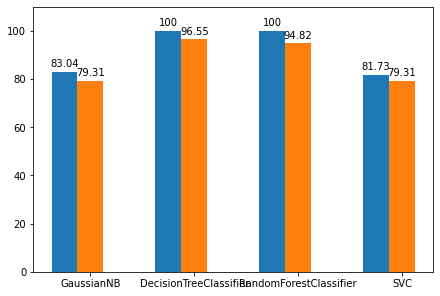

In [348]:
models = ("GaussianNB","DecisionTreeClassifier", "RandomForestClassifier", "SVC")
accuracies = {
    'Trainacc': (83.04,100, 100, 81.73),
    'Testacc': (79.31,96.55, 94.82, 79.31)

}

x = np.arange(len(models)) 
width = 0.25  # the width of the bars
multiplier = 0
plt.figure(figsize=(15,13))

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xticks(x + width, models)
ax.set_ylim(0, 110)


plt.show()

In [336]:
joblib.dump(dt,'model.pkl')

['model.pkl']